# Brain MRI Tumor Segmentation
## Otsu vs Sauvola Thresholding

**Objective:**  
Segment tumor regions from brain MRI images and compare global and
adaptive thresholding techniques.

**Methods Used:**  
- Otsu Thresholding  
- Sauvola Thresholding  

**Dataset:**  
Brain MRI Tumor Dataset (images and masks)

**Evaluation Metrics:**  
- Dice Score  
- Jaccard Index


## 1. Import Required Libraries

In this section, we import all the necessary Python libraries required for:
- Image processing
- Thresholding techniques
- Evaluation metrics
- Visualization


In [2]:
pip install scikit-learn


  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-le


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color
from skimage.filters import threshold_otsu, threshold_sauvola
from skimage.morphology import remove_small_objects

from sklearn.metrics import jaccard_score


## 2. Load Dataset

Here, we define the dataset path and load the MRI images and corresponding
ground truth tumor masks from the local system.


In [4]:
DATASET_PATH = r'C:\Users\Asus\Downloads\mri_dataset'

IMAGE_DIR = os.path.join(DATASET_PATH, "images")
MASK_DIR = os.path.join(DATASET_PATH, "masks")

image_files = sorted(os.listdir(IMAGE_DIR))
mask_files = sorted(os.listdir(MASK_DIR))

print("Total Images:", len(image_files))
print("Total Masks:", len(mask_files))


Total Images: 3064
Total Masks: 3064


## 3. Evaluation Metrics

We use the following metrics to compare segmentation performance:

- **Dice Score**: Measures overlap between predicted mask and ground truth.
- **Jaccard Index (IoU)**: Measures intersection over union of predicted and true regions.


In [5]:
def dice_score(gt, pred):
    gt = gt.flatten()
    pred = pred.flatten()
    
    intersection = np.sum(gt * pred)
    return (2.0 * intersection) / (np.sum(gt) + np.sum(pred) + 1e-8)


In [6]:
def jaccard_index(gt, pred):
    gt = gt.flatten()
    pred = pred.flatten()
    
    return jaccard_score(gt, pred)


## 4. Global Otsu Thresholding

Otsu thresholding is a global method that computes a single threshold
value based on the image histogram. It works best when foreground and
background intensities are clearly separable.


In [7]:
def apply_otsu(image):
    threshold = threshold_otsu(image)
    binary = image > threshold
    binary = remove_small_objects(binary, min_size=50)
    return binary


## 5. Sauvola Adaptive Thresholding

Sauvola thresholding is a local adaptive method where the threshold
value is computed for each pixel using local mean and standard deviation.
This helps in handling non-uniform illumination in MRI images.


In [16]:
def apply_sauvola(image):
    window_size = 31
    k = 0.2  # relaxed sensitivity
    
    threshold = threshold_sauvola(image, window_size=window_size, k=k)
    binary = image >= threshold * 0.9   # IMPORTANT CHANGE
    
    binary = remove_small_objects(binary, min_size=10)
    return binary


## 6. Segmentation and Metric Computation

In this step, we:
- Read each MRI image and its corresponding mask
- Apply Otsu and Sauvola thresholding
- Compute Dice Score and Jaccard Index for both methods


In [ ]:
dice_otsu, dice_sauvola = [], []
jaccard_otsu, jaccard_sauvola = [], []

for img_name, mask_name in zip(image_files, mask_files):
    
    image = io.imread(os.path.join(IMAGE_DIR, img_name))
    mask = io.imread(os.path.join(MASK_DIR, mask_name))
    
    # Convert to grayscale
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
        
    if len(mask.shape) == 3:
        mask = color.rgb2gray(mask)
    
    # Convert image to float
    image = image.astype(np.float32)
    
    image = (image - image.min()) / (image.max() - image.min() + 1e-8)
    
    # Convert mask to binary
    mask = mask.astype(np.float32)
    mask = (mask > 0.5).astype(np.uint8)
    
    # Apply thresholding AFTER normalization
    otsu_pred = apply_otsu(image)
    sauvola_pred = apply_sauvola(image)
    
    # Convert predictions to uint8
    otsu_pred = otsu_pred.astype(np.uint8)
    sauvola_pred = sauvola_pred.astype(np.uint8)
    
    # Metrics
    dice_otsu.append(dice_score(mask, otsu_pred))
    dice_sauvola.append(dice_score(mask, sauvola_pred))
    
    jaccard_otsu.append(jaccard_index(mask, otsu_pred))
    jaccard_sauvola.append(jaccard_index(mask, sauvola_pred))


C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\1075779032.py:4: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  binary = remove_small_objects(binary, min_size=50)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\821018805.py:8: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  binary = remove_small_objects(binary, mi

## 7. Performance Comparison

We compute the average Dice Score and Jaccard Index across the entire dataset
to quantitatively compare Otsu and Sauvola thresholding methods.


In [18]:
print("Average Performance Metrics\n")

print("Otsu Thresholding")
print("Dice Score:", np.mean(dice_otsu))
print("Jaccard Index:", np.mean(jaccard_otsu))

print("\nSauvola Thresholding")
print("Dice Score:", np.mean(dice_sauvola))
print("Jaccard Index:", np.mean(jaccard_sauvola))


Average Performance Metrics

Otsu Thresholding
Dice Score: 0.07076148860411227
Jaccard Index: 0.03765756883585013

Sauvola Thresholding
Dice Score: 0.03963057278612863
Jaccard Index: 0.02048174243670132


## 8. Performance Comparison Graph

This section visualizes the average Dice Score and Jaccard Index for
Otsu and Sauvola thresholding methods, enabling an intuitive comparison
of segmentation performance.


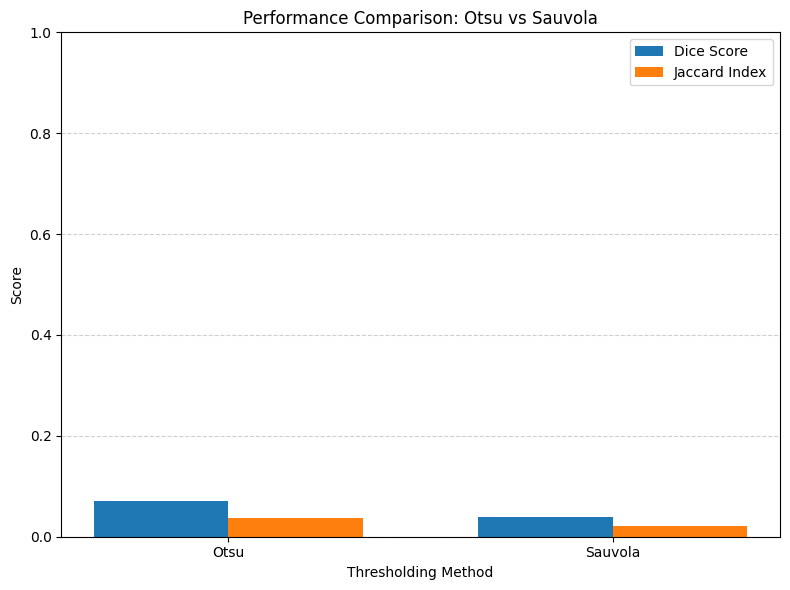

In [19]:
# Compute average performance metrics
avg_dice_otsu = np.mean(dice_otsu)
avg_dice_sauvola = np.mean(dice_sauvola)

avg_jaccard_otsu = np.mean(jaccard_otsu)
avg_jaccard_sauvola = np.mean(jaccard_sauvola)

methods = ['Otsu', 'Sauvola']

dice_scores = [avg_dice_otsu, avg_dice_sauvola]
jaccard_scores = [avg_jaccard_otsu, avg_jaccard_sauvola]

x = np.arange(len(methods))
width = 0.35

plt.figure(figsize=(8, 6))

plt.bar(x - width/2, dice_scores, width, label='Dice Score')
plt.bar(x + width/2, jaccard_scores, width, label='Jaccard Index')

plt.xlabel('Thresholding Method')
plt.ylabel('Score')
plt.title('Performance Comparison: Otsu vs Sauvola')
plt.xticks(x, methods)
plt.ylim(0, 1)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 9. Visual Comparison

We visualize the segmentation results for a sample MRI slice to
qualitatively compare Otsu and Sauvola thresholding.


C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\1075779032.py:4: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  binary = remove_small_objects(binary, min_size=50)
C:\Users\Asus\AppData\Local\Temp\ipykernel_27204\821018805.py:8: FutureWarning: Parameter `min_size` is deprecated since version 0.26.0 and will be removed in 2.0.0 (or later). To avoid this warning, please use the parameter `max_size` instead. For more details, see the documentation of `remove_small_objects`. Note that the new threshold removes objects smaller than **or equal to** its value, while the previous parameter only removed smaller ones.
  binary = remove_small_objects(binary, mi

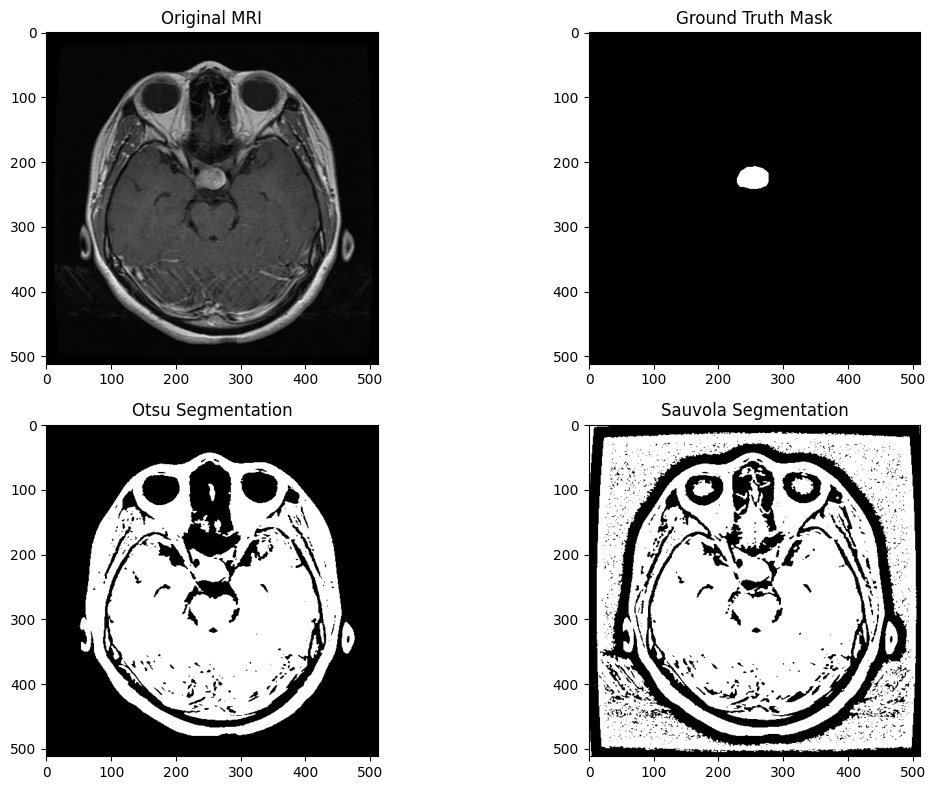

In [20]:
idx = 5

image = io.imread(os.path.join(IMAGE_DIR, image_files[idx]))
mask = io.imread(os.path.join(MASK_DIR, mask_files[idx]))

if len(image.shape) == 3:
    image = color.rgb2gray(image)

mask = (mask > 0)

otsu_pred = apply_otsu(image)
sauvola_pred = apply_sauvola(image)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original MRI")

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(2, 2, 3)
plt.imshow(otsu_pred, cmap='gray')
plt.title("Otsu Segmentation")

plt.subplot(2, 2, 4)
plt.imshow(sauvola_pred, cmap='gray')
plt.title("Sauvola Segmentation")

plt.tight_layout()
plt.show()


## Learning Outcomes

- Global Otsu thresholding is simple but sensitive to intensity variations.
- Sauvola adaptive thresholding performs better under non-uniform illumination.
- Dice and Jaccard metrics provide quantitative validation of segmentation quality.
- Adaptive thresholding is generally more suitable for medical image segmentation.
